# Assignment 04


In this assignment we will examine ["Forest Fires"](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) dataset to predict the burned area of forest fires giving some features. We will apply model selection and cross-validation method we learned.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
np.set_printoptions(precision=3)
seed=0

## Question 1.0 [ _ /6 marks]

Read the file `forestfires.csv` into a dataframe. Display the first 5 rows of this dataframe. 

In [2]:
# Read forestfires.csv into a dataframe [ /1 marks] 
df = pd.read_csv('forestfires.csv')


# Display the first 5 rows of the dataframe [ /1 marks]
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Inspect the data types of the attributes in the dataframe and answer the question in the next cell
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


 **Questions**:
 1. How many rows are there?  [ /1 marks]
 2. Does the data consist of any null entries? [ /1 marks]
 3. What categorical attributes do you see? [ /2 marks]
 
**Your answer**:
1. There are in total 517 rows
2. There are no null entries in this dataset
3. The categorical attributes in this dataset are: month and day

## Question 1.1 [ _ /15 marks]

Using the threshold of statistical significance for linear regression, check statistical significance of the labels of each categorical attribute. Group insignificant labels into two new statistically significant labels.

In [4]:
# Check statistical significance of the labels in categorical attribute 1. [ /3 marks]
#Checking month in this cell
df.month.value_counts()

#All the labels from 'feb' to 'nov' are not significant

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [5]:
# Check statistical significance of labels in categorical attribute 2. [ /3 marks]
#Checking day in this cell
df.day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [6]:
# Group insignificant labels into two new statistically significant labels. [ /8 marks]
grouping = {'month': {'jun': 'groupOne', 'oct': 'groupOne', 'apr': 'groupOne', 'nov': 'groupOne', 'feb': 'groupTwo', 'dec': 'groupTwo', 'jan': 'groupTwo', 'may': 'groupTwo'}}
df = df.replace(grouping)

In [7]:
# Recheck statistical significance of the attribute with adjusted labels [ /1 marks]
df.month.value_counts()

aug         184
sep         172
mar          54
groupOne     42
groupTwo     33
jul          32
Name: month, dtype: int64

## Question 1.2 [ _ /4 marks]

Let's convert all categorical data into numerical data using `get_dummies`. Before that we need tp specify this data as *Categorical*; this has been done for you for the "month" column (you will need to do the same for the "day" column). Display the first 5 rows of your new dataframe.

In [8]:
# Use "get_dummies" to perform one hot encoding to the categorical attributes [ /3 marks]
modelData = pd.get_dummies(df)


# Display first 5 rows of the dataframe [ /1 mark]
modelData.head() 


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_jul,month_mar,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,1,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,1,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,1,0,0,0,0,1,0,0,0


In [9]:
# The .head() in the previous cell might give a truncated view. You can see all columns names using: 
modelData.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_aug', 'month_groupOne', 'month_groupTwo', 'month_jul',
       'month_mar', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

## Question 1.3 [ _ /8 marks]

Let's examine the distribution of the target variable "area".

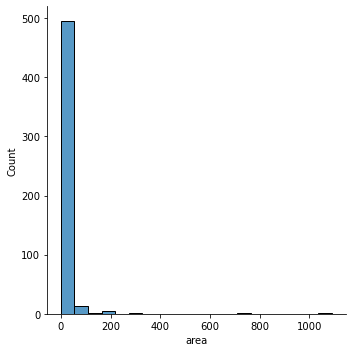

In [10]:
# Plot the distribution of target variable "area" with bins = 20 using an appropriate seaborn function [ /1 mark]
sns.displot(data = modelData, x = 'area', kind = 'hist', bins = 20)

 **Question**:
 
 Describe the distribution of the target variable. We will use log transform on it, explain why would it help. [ /3 mark]

**Your answer**:The distribution of the target variable 'area' is very concentrated around the 0-100 mark meaning it is very right-skewed.  A log transform would help this data as the original data is highly highly skewed to one side, the log transformation will help to give us a more readable and normal distribution on the plot.  

Here

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64


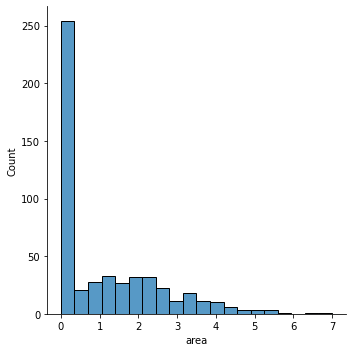

In [11]:
# Use np.log to transform "area". [ /3 mark]
# Note that log is not defined every where and you might need to do something about it.
modelData['area'] = modelData['area'].apply(np.log1p) #I used np.log1p to fix the log not being defined everywhere problem
print(modelData['area'])

# Plot the distribution of target variable "area" with bins = 20 using an appropriate seaborn function [ /1 mark]
sns.displot(data = modelData, x = 'area', kind = 'hist', bins = 20)


## Question 1.4 [ _ /6 marks]

Let's use **mean squared error** as our score metric. We can use `sklearn.metrics.mean_squared_error`, but here let's write our own function called `mse` with arguments `y` and `ypr`(predicted y) which returns the mean squared error. Recall the formula for MSE below:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}  \left( \hat{y_{i}}-y_{i}\right)^{2} $$

In [12]:
# Define a function that takes in y's and returns MSE [ /6 marks]
def mse(y, ypr):
    ydiff = ypr - y
    MSE = np.sum(ydiff**2) / len(y)
    
    return MSE


## Question 1.5 [ _ /4 marks]

We will use all available features as predictors, and use the log transformed "area" as target variable. Then let's split our data into training and test. As usual, let's use test_size=0.2 and random_state=seed.

In [13]:
# Create X and y [ /2 marks]
X = modelData.drop('area', axis = 'columns')
y = modelData['area']

# Use train_test_split on X, y [ /2 marks]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = seed)
print(xtrain.shape, ytrain.shape)


(413, 23) (413,)


## Question 1.6 [ _ / 6 marks]

For our first model, create a pipeline called "M1" that performs only a linear regression. 

In [14]:
# Create a pipeline for model 1 (M1) [ /6 marks]
M1 = Pipeline([
    ('stdScale', StandardScaler()), 
    ('linReg', LinearRegression())
])
M1 = LinearRegression().fit(xtrain, ytrain)

## Question 1.7 [ _ / 8 marks]

For our second model let's add quadratic terms for all features (use `PolynomialFeatures`). Create a model pipeline for our second model (M2).

In [15]:
# Create a pipeline for model 2 (M2) [ / 8 marks]
M2 = Pipeline([
    ('stdScale', StandardScaler()), 
    ('polyFeat', PolynomialFeatures(degree = 2)), 
    ('linReg', LinearRegression())
])

PT = PolynomialFeatures(degree = 2)
xtrain2 = PT.fit_transform(xtrain)
M2 = LinearRegression().fit(xtrain2, ytrain)

## Question 1.8 [ _ / 18 marks]

`Temperature (temp)` and `Rain (rain)` may be important features, so let's extend model 1 by adding a *cubed* term for temp and a *squared* term for rain. Before creating a pipeline for this model, we need a custom transformer: here we can specify a column for the squared temp and cubed RH terms. The transformer has been initialized below, but you'll need to finish it with 1-2 lines of code. After this, create your corresponding pipeline (M3).

In [16]:
# Modify the transform method of the KeyFeatures class [ /10 marks]
class KeyFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return

    def transform(self, X, y=None):
        X = X.assign(temp2 = X.temp**3, rain2 = X.rain**2)
        return

# Create a pipeline for model 3 (M3) [ /8 marks]
M3 = Pipeline([
    ('temp2', KeyFeatures()), 
    ('rain2', KeyFeatures()), 
    ('linReg', LinearRegression())
])

xtrain3 = xtrain
xtrain3 = xtrain3.assign(temp2 = xtrain.temp**3, rain2 = xtrain.rain**2)
M3 = LinearRegression().fit(xtrain3, ytrain)

## Question 1.9 [ _ /8 marks]

For models 1-3, use 4-fold Cross-validation (CV) on the training set to get the mean and std of score. Use your own `mse` function as your score metric.

In [17]:
# Use 4-fold CV on all models to get mean and std of score [ /8 marks]
from sklearn.model_selection import KFold

kFour = KFold(n_splits = 4, shuffle = False)
mseScore = make_scorer(mse)
cvsc1 = cross_val_score(M1, xtrain, ytrain, cv = kFour, scoring = mseScore)
cvsc2 = cross_val_score(M2, xtrain2, ytrain, cv = kFour, scoring = mseScore)
cvsc3 = cross_val_score(M3, xtrain3, ytrain, cv = kFour, scoring = mseScore)

print(f"M1 loss: %.4f +/- %.4f" % (cvsc1.mean(), cvsc1.std()))
print(f"M2 loss: %.4f +/- %.4f" % (cvsc2.mean(), cvsc2.std()))
print(f"M3 loss: %.4f +/- %.4f" % (cvsc3.mean(), cvsc3.std()))

M1 loss: 1.9348 +/- 0.1605
M2 loss: 40.0269 +/- 11.1773
M3 loss: 20.7243 +/- 32.3091


## Question 2.0 [ _ / 3 marks]

**Question**: 

Which model would you choose and why? [ /3 marks]

**Your answer**: Out of the three different models, the one that we should choose for this dataset would be the simplest model 1 (M1) because it has the lowest cross-validation training loss of the three models we tested

Here...

## Question 2.1 [ _ /  6 marks]

Estimate the performance of your chosen model on the test data (which has been held out) using `mse`. 

In [18]:
# Compute the test loss on the unseen (test) dataset [ /6 marks]
M1 = M1.fit(xtrain, ytrain)
testLoss = mse(ytest, M1.predict(xtest))

print('MSE Loss on test data: %.3f' % testLoss)

MSE Loss on test data: 2.513


## Question 2.2 [ _ /8 marks]

Recap: The central limit theorem (CLT) states that if you have a population with mean $\mu$ and standard deviation $\sigma$ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually greater than 30).

Compute (and print) a 95% confidence interval for the average test error using the Central Limit Theorem. You can use the following formula to compute it: 

$$ \bar{L_n} \pm 1.96 * \frac{\sigma_{l}}{\sqrt{n}}$$

Here $\bar{L_n}$ is the average test loss (i.e. for our test set), $\sigma_l$ is the standard deviation (of our test losses), and $n$ is the total number of test losses we compute.  

In [19]:
# Test loss here is a point estimate (statistic) for the generalization error
# Having >30 samples, we can use the formula above safely
# Here we compute confidence interval for generalization error (i.e.expected [average] test loss for this particular dataset)

# Calculate the 95% Confidence Interval for average test loss [ /8 marks]
CIUpper = testLoss + 1.96 * (np.std(testLoss) / np.sqrt(len(ytest)))
CILower = testLoss - 1.96 * (np.std(testLoss) / np.sqrt(len(ytest)))


print(f'Confidence Interval is: {CILower} to {CIUpper}')

Confidence Interval is: 2.513429829926705 to 2.513429829926705


# Follow these instructions:

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.